<a href="https://colab.research.google.com/github/juliablaz2003/UFV_visualizacion/blob/main/Ejercicios%20de%20clase/clase2_18oct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRACTICA 1

## PARTE DE CLASE

Importamos las bibliotecas necesarias y definimos la URL del archivo CSV para leerlo.

In [195]:
import pandas as pd
import matplotlib.pyplot as plt

# Enlace al archivo CSV en la versión "raw" de GitHub
url = 'https://raw.githubusercontent.com/juliablaz2003/UFV_visualizacion/refs/heads/main/Ejercicios%20de%20clase/datos_ejercicio_ventas.csv?token=GHSAT0AAAAAACY2AYSANNLCYBFJJY2YA7HQZZONMHA'
# Leer el archivo CSV directamente desde GitHub
df = pd.read_csv(url, sep = ',')

# Mostrar las primeras filas del DataFrame
df.head()

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT
0,Portugal,Lipton (L3),2023,12,AI_forecast,AI_P02F,2023.0,754356.237194
1,Great Britain,Lipton (L3),2023,12,AI_forecast,AI_P10F,2023.0,560030.558029
2,Spain,Pepsi Max (L3),2023,12,AI_forecast,AI_P09F,2023.0,88501.980847
3,Great Britain,7up (L3),2024,12,AI_forecast,AI_P10F,2023.0,363224.511516
4,Hungary,Lipton (L3),2023,9,AI_forecast,AI_P03F,2023.0,396176.120491


Podemos hacer una exploración inicial para entender mejor la estructura de los datos.

En este caso esta línea de código muestra los nombres de todas las columnas.

In [196]:
print(df.columns)

Index(['COUNTRY', 'SUBBRAND', 'YEAR', 'MONTH', 'SCENARIO', 'FORECAST',
       'FORECAST_YEAR', 'AMOUNT'],
      dtype='object')


El resultado muestra que el DataFrame tiene las siguientes columnas:
- COUNTRY: el país donde se registra la venta o predicción.
- SUBBRAND: la sub-marca del producto, como por ejemplo, diferentes versiones de una bebida.
- YEAR y MONTH: el año y el mes en que se registra la venta o la predicción.
- SCENARIO: indica si es un dato de venta real (actual) o una predicción (AI_forecast).
- FORECAST: información sobre el tipo de predicción, asociada a un periodo específico.
- FORECAST_YEAR: el año en que se realizó la predicción.
- AMOUNT: el volumen de ventas en litros.

Esta línea me dice el tipo de dato que es.

In [197]:
print(df.dtypes)

COUNTRY           object
SUBBRAND          object
YEAR               int64
MONTH              int64
SCENARIO          object
FORECAST          object
FORECAST_YEAR    float64
AMOUNT           float64
dtype: object


El resultado nos da:

- COUNTRY y SUBBRAND: Son de tipo object, lo que significa que contienen texto o datos categóricos.
- YEAR y MONTH: Son de tipo int64, lo cual es adecuado para valores enteros, como los años y meses.
- SCENARIO y FORECAST: Son de tipo object, probablemente conteniendo texto que describe el escenario (actual o AI_forecast) y el tipo de predicción.
- FORECAST_YEAR y AMOUNT: Son de tipo float64, lo cual es adecuado para datos numéricos con decimales, como el año de la predicción (si incluye decimales) y el volumen de ventas en litros.

1. Número de filas

Para obtener el número de filas usamos la función *shape* que nos proporciona una tupla con la cantidad de filas y columnas, y [0] selecciona solo el valor de filas.

In [198]:
num_filas = df.shape[0]
print(f"Número de filas: {num_filas}")

Número de filas: 18666


En este caso vemos que el número de filas que hay en el dataset es de 18666.

2. Número de "actuals" y "forecasts"

Para calcular el número de ventas reales y predicciones lo primero es filtrar y contar los registros de cada uno y los filtra por la columna SCENARIO.

In [199]:
num_actuals = df[df['SCENARIO'] == 'actual'].shape[0]
num_forecasts = df[df['SCENARIO'] == 'AI_forecast'].shape[0]

print(f"Número de actuals: {num_actuals}")
print(f"Número de forecasts: {num_forecasts}")

Número de actuals: 900
Número de forecasts: 17766


En este caso vemos que hay 900 registros de ventas reales y 17.766 registros de predicciones enn el conjunto de datos.

3. Horizonte de predicción

El horizonte de predicción es el tiempo que transcurre entre el momento en que se hace una predicción y el momento en el que ocurre el evento que se predijo. En el contexto de ventas o demanda, el horizonte de predicción representa el lapso, medido en meses, entre la fecha en que se hace la predicción y la fecha real en la que se espera que suceda la venta.

El código que hemos utilizado para calcular el horizonte de predicción se centra en obtener un número específico que siempre será el mismo, en este caso, 18.

Esto se debe a que estamos filtrando el conjunto de datos para una combinación particular de país, submarca y tipo de forecast, lo que nos da un conjunto fijo de registros que corresponden a un periodo determinado.

In [200]:
norway_7up = df[(df['COUNTRY'] == 'Norway') & (df['SUBBRAND'] == '7up (L3)') & (df['FORECAST'] == 'AI_P02F')]

norway_7up

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT
1636,Norway,7up (L3),2023,8,AI_forecast,AI_P02F,2023.0,10440.460773
2433,Norway,7up (L3),2023,5,AI_forecast,AI_P02F,2023.0,11265.176976
2788,Norway,7up (L3),2023,11,AI_forecast,AI_P02F,2023.0,1655.848543
6646,Norway,7up (L3),2023,3,AI_forecast,AI_P02F,2023.0,6678.193437
7044,Norway,7up (L3),2023,10,AI_forecast,AI_P02F,2023.0,0.000000
7223,Norway,7up (L3),2024,5,AI_forecast,AI_P02F,2023.0,4753.377529
7897,Norway,7up (L3),2023,6,AI_forecast,AI_P02F,2023.0,10674.547765
10637,Norway,7up (L3),2024,3,AI_forecast,AI_P02F,2023.0,3861.897766
12308,Norway,7up (L3),2024,4,AI_forecast,AI_P02F,2023.0,994.153833
12317,Norway,7up (L3),2023,7,AI_forecast,AI_P02F,2023.0,11330.754229


En este caso, solo nos interesa el número de filas, ya que cada fila representa una ejecución de forecast en un mes específico por lo que imprimimos el número de filas.

In [201]:
norway_7up.shape
print(f'El horizonte de predicción es: {norway_7up.shape[0]}')

El horizonte de predicción es: 18


4. Número de países y de productos

Vamos a contar el número de países únicos en la columna COUNTRY y el número de marcas/productos únicos en la columna SUBBRAND.

In [202]:
# Número de países y productos
num_paises = df['COUNTRY'].nunique()
num_productos = df['SUBBRAND'].nunique()

# Listado de países y productos únicos
paises_unicos = df['COUNTRY'].unique()
productos_unicos = df['SUBBRAND'].unique()

print(f"Número de países: {num_paises}")
print(paises_unicos)
print(f"\nNúmero de productos: {num_productos}")
print(productos_unicos)

Número de países: 9
['Portugal' 'Great Britain' 'Spain' 'Hungary' 'Norway' 'Denmark'
 'Netherlands' 'Italy' 'Czech']

Número de productos: 6
['Lipton (L3)' 'Pepsi Max (L3)' '7up (L3)' 'Pepsi Regular (L3)'
 'Mountain Dew (L3)' '7up Free (L3)']


5. Histórico de actuals/forecast

Para obtener el primer y último registro de los datos de ventas reales lo primero que haremos será filtrar el DataFrame para obtener solo los registros de 'actuals' cogiendo únicamente las columnas relevantes: COUNTRY, SUBBRAND, YEAR, MONTH, SCENARIO, y AMOUNT.

In [203]:
historico_actuals = df[df['SCENARIO'] == 'actual'][['COUNTRY', 'SUBBRAND', 'YEAR', 'MONTH', 'SCENARIO', 'AMOUNT']]

Este paso organiza los datos en historico_actuals en orden ascendente, primero por YEAR y luego por MONTH, esto asuegura que los registros esten ordenados en orden cronológico.

In [204]:
historico_actuals = historico_actuals.sort_values(by=['YEAR', 'MONTH'])

Utilizamos head(1) para seleccionar la primera fila de historico_actuals, correspondiente al registro más antiguo tras ordenar por fecha.

In [205]:
primer_registro = historico_actuals.head(1)

Utilizamos tail(1) para seleccionar la última fila de historico_actuals, correspondiente al registro más reciente tras ordenar por fecha.

In [206]:
ultimo_registro = historico_actuals.tail(1)

 Imprimimos el primer y el último registro de historico_actuals con mensajes descriptivos.

In [207]:
print("Primer registro en 'actuals' (ordenado por fecha):")
print(primer_registro)

print("\nÚltimo registro en 'actuals' (ordenado por fecha):")
print(ultimo_registro)

Primer registro en 'actuals' (ordenado por fecha):
     COUNTRY        SUBBRAND  YEAR  MONTH SCENARIO        AMOUNT
2884   Spain  Pepsi Max (L3)  2023      1   actual  83274.055497

Último registro en 'actuals' (ordenado por fecha):
      COUNTRY        SUBBRAND  YEAR  MONTH SCENARIO        AMOUNT
17720  Norway  Pepsi Max (L3)  2024      8   actual  3.110356e+06


Y esto lo hacemos también para el histórico de forecasts, siguiendo el mismo proceso para encontrar el primer y último registro en términos de fecha en las predicciones (AI_forecast).

In [208]:
# Filtramos el DataFrame para obtener solo los registros de 'AI_forecast'
historico_forecasts = df[df['SCENARIO'] == 'AI_forecast'][['COUNTRY', 'SUBBRAND', 'YEAR', 'MONTH', 'SCENARIO', 'FORECAST', 'FORECAST_YEAR', 'AMOUNT']]

# Ordenamos los registros por FORECAST_YEAR y FORECAST para obtener el orden cronológico de las predicciones
historico_forecasts = historico_forecasts.sort_values(by=['FORECAST_YEAR', 'YEAR', 'MONTH'])

# Obtenemos el primer registro en términos de fecha de predicción
primer_forecast = historico_forecasts.head(1)

# Obtenemos el último registro en términos de fecha de predicción
ultimo_forecast = historico_forecasts.tail(1)

# Mostramos el primer y el último registro en términos de fecha de predicción
print("Primer registro en 'forecasts' (ordenado por fecha):")
print(primer_forecast)

print("\nÚltimo registro en 'forecasts' (ordenado por fecha):")
print(ultimo_forecast)

Primer registro en 'forecasts' (ordenado por fecha):
   COUNTRY        SUBBRAND  YEAR  MONTH     SCENARIO FORECAST  FORECAST_YEAR  \
34   Czech  Pepsi Max (L3)  2023      1  AI_forecast    AI_PF         2023.0   

           AMOUNT  
34  317424.378124  

Último registro en 'forecasts' (ordenado por fecha):
       COUNTRY  SUBBRAND  YEAR  MONTH     SCENARIO FORECAST  FORECAST_YEAR  \
18543  Hungary  7up (L3)  2025      5  AI_forecast  AI_P12F         2023.0   

       AMOUNT  
18543     0.0  


6. Cuántas ejecuciones de forecast hay

Para ver cuantas ejecuciones de forecast tiene la base de datos agrupamos los registros filtrados de AI_forecast según los valores de la columna FORECAST.

In [209]:
ejecuciones_por_forecast = df[df['SCENARIO'] == 'AI_forecast'].groupby('FORECAST').size()

# Mostramos los resultados por tipo de forecast
ejecuciones_por_forecast

,0
FORECAST,
AI_P02F,1278
AI_P03F,1278
AI_P04F,1476
AI_P05F,1494
AI_P06F,1422
AI_P07F,1476
AI_P08F,1566
AI_P09F,1566
AI_P10F,1620


7. Forecasts distintos

Para contar cuántos tipos únicos de forecast (FORECAST) existen en el conjunto de datos para los registros de predicción (AI_forecast),  utilizamos .nunique() después de filtrar los datos.

Esto nos dará el número total de valores únicos en la columna FORECAST para las predicciones.

In [210]:
forecast_distintos = df['FORECAST'].nunique()
print(f"Forecasts distintos: {forecast_distintos}")

Forecasts distintos: 12


## PRÁCTICA

8. Distribución de ventas realizadas

Podemos hacer un análisis de cómo se distribuyen las ventas por país, mes y año, y por marca.

Distribución de ventas por país:
COUNTRY
Czech            6.384946e+08
Denmark          3.173959e+09
Great Britain    8.427775e+09
Hungary          1.104465e+09
Italy            5.058963e+08
Netherlands      1.831524e+09
Norway           1.858965e+09
Portugal         3.871816e+08
Spain            2.184936e+08
Name: AMOUNT, dtype: float64


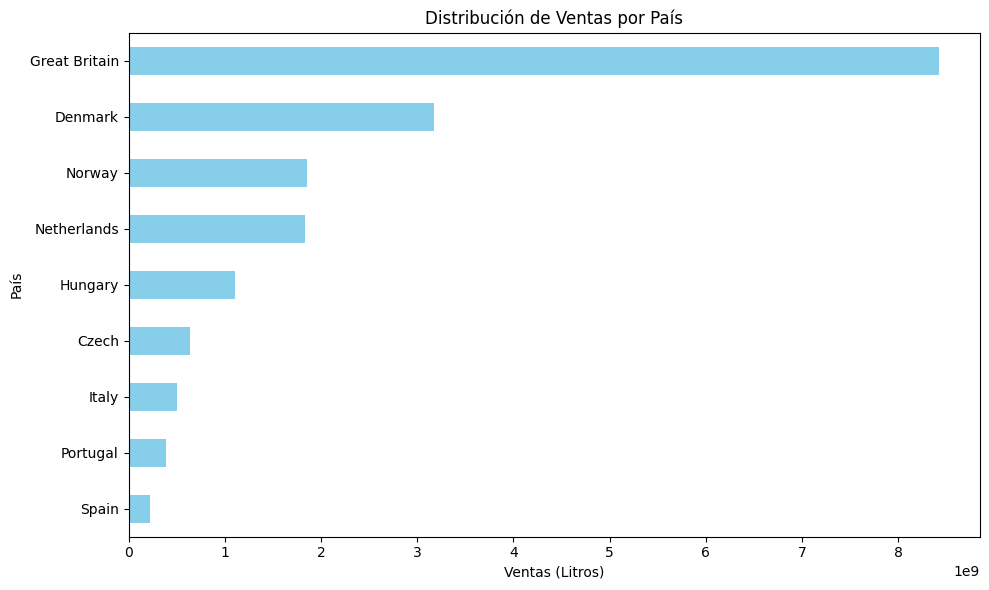

In [211]:
# Distribución de ventas por país
ventas_pais = df.groupby('COUNTRY')['AMOUNT'].sum()

print("Distribución de ventas por país:")
print(ventas_pais)

# Gráfico de la distribución de ventas por país
plt.figure(figsize=(10, 6))
ventas_pais.sort_values().plot(kind='barh', color='skyblue')
plt.title('Distribución de Ventas por País')
plt.xlabel('Ventas (Litros)')
plt.ylabel('País')
plt.tight_layout()
plt.show()

La gráfica muestra una distribución desigual en el volumen de ventas por país, destacando a Great Britain como el mercado principal con 8.4 mil millones de litros, seguido por Denmark con 3.17 mil millones. Norway y Netherlands tienen ventas similares, alrededor de 1.8 mil millones, mientras que Hungary alcanza 1.1 mil millones. Czech, Italy, Portugal y Spain tienen los volúmenes más bajos, con Spain en último lugar con 218 millones de litros. Esto sugiere que Great Britain y Denmark dominan el mercado, mientras que Portugal y Spain podrían ser oportunidades para aumentar las ventas.










Distribución de ventas por mes y año:
YEAR  MONTH
2023  1        9.310165e+07
      2        1.612275e+08
      3        2.696923e+08
      4        3.353694e+08
      5        4.550054e+08
      6        5.304364e+08
      7        6.288473e+08
      8        7.474676e+08
      9        7.679450e+08
      10       7.890140e+08
      11       9.085069e+08
      12       1.049411e+09
2024  1        8.448844e+08
      2        8.408047e+08
      3        1.009033e+09
      4        9.872097e+08
      5        1.065666e+09
      6        1.057691e+09
      7        9.981979e+08
      8        9.357902e+08
      9        7.411355e+08
      10       6.168697e+08
      11       5.632671e+08
      12       5.262705e+08
2025  1        3.783377e+08
      2        2.977278e+08
      3        2.746941e+08
      4        1.780384e+08
      5        9.511169e+07
Name: AMOUNT, dtype: float64


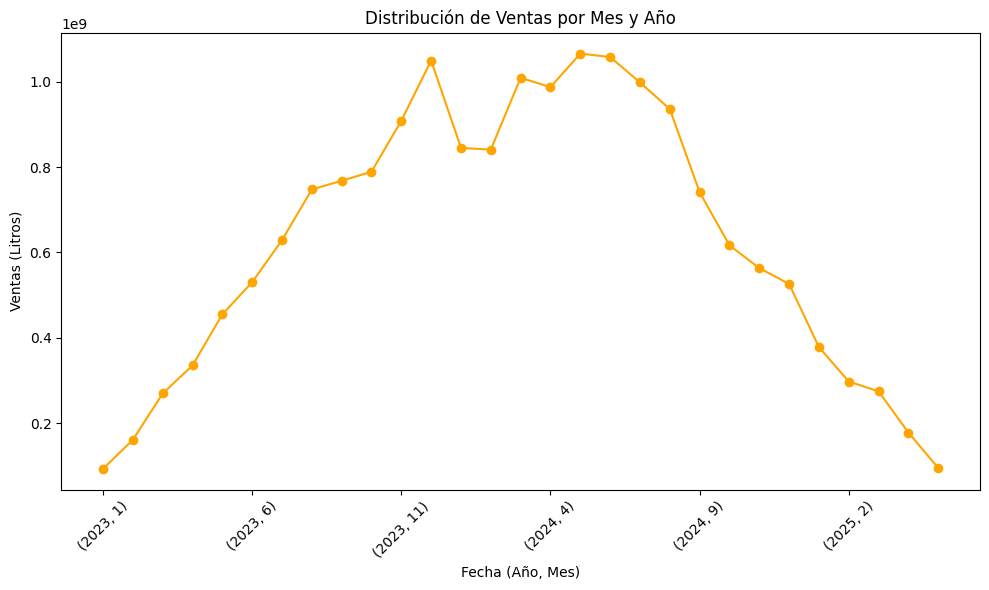

In [212]:
# Distribución de ventas por mes y año
ventas_mes_anio = df.groupby(['YEAR', 'MONTH'])['AMOUNT'].sum()

print("\nDistribución de ventas por mes y año:")
print(ventas_mes_anio)

# Gráfico de la distribución de ventas por mes y año
plt.figure(figsize=(10, 6))
ventas_mes_anio.plot(kind='line', marker='o', color='orange')
plt.title('Distribución de Ventas por Mes y Año')
plt.xlabel('Fecha (Año, Mes)')
plt.ylabel('Ventas (Litros)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La gráfica muestra un aumento constante en las ventas durante 2023, de 93 millones en enero a 1.05 mil millones en diciembre, indicando crecimiento de demanda o estrategias exitosas. En 2024, las ventas se mantienen altas en el primer semestre, alcanzando un pico de 1.07 mil millones en mayo, pero descienden gradualmente en el segundo semestre hasta 526 millones en diciembre, sugiriendo estacionalidad. En 2025, las ventas caen notablemente, de 378 millones en enero a 95 millones en mayo, lo que podría indicar un cambio en el mercado o en la demanda. La gráfica refleja un ciclo de crecimiento y estabilidad, seguido de una disminución.


Distribución de ventas por marca:
SUBBRAND
7up (L3)              2.917746e+08
7up Free (L3)         1.066603e+09
Lipton (L3)           1.682028e+09
Mountain Dew (L3)     1.316731e+08
Pepsi Max (L3)        1.229538e+10
Pepsi Regular (L3)    2.679291e+09
Name: AMOUNT, dtype: float64


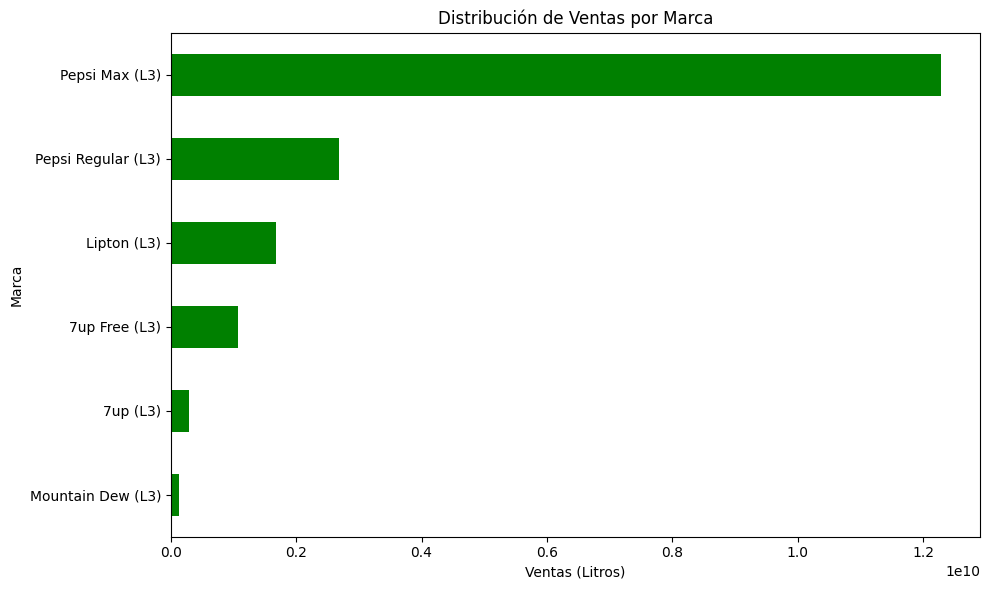

In [213]:
# Distribución de ventas por marca
ventas_marca = df.groupby('SUBBRAND')['AMOUNT'].sum()

print("\nDistribución de ventas por marca:")
print(ventas_marca)

# Gráfico de la distribución de ventas por marca
plt.figure(figsize=(10, 6))
ventas_marca.sort_values().plot(kind='barh', color='green')
plt.title('Distribución de Ventas por Marca')
plt.xlabel('Ventas (Litros)')
plt.ylabel('Marca')
plt.tight_layout()
plt.show()

La gráfica muestra a Pepsi Max (L3) como líder en ventas con 12.3 mil millones de litros, muy por encima de las demás. Pepsi Regular (L3) sigue con 2.7 mil millones, en una posición significativa aunque lejana. Lipton (L3) y 7up Free (L3) tienen ventas moderadas, con 1.7 mil millones y 1.06 mil millones de litros, respectivamente. Las marcas con menor volumen son 7up (L3) y Mountain Dew (L3), con 291 y 131 millones de litros. Esto sugiere que Pepsi domina las ventas, especialmente con Pepsi Max, mientras que las demás tienen menor participación.

9. Tendencia y estacionalidad

Vamos a analizar la tendencia y estacionalidad de las ventas del país con menos ventas y la marca con más ventas.

Primero agrupamos los datos por país y marca, sumamos las ventas de cada grupo (AMOUNT), y encontramos el país con menos ventas.

Como nos interesa ver cómo cambian las ventas mes a mes, agrupamos las ventas mensuales por año y mes.

In [214]:
# País con menos ventas
pais_menos_ventas = df.groupby('COUNTRY')['AMOUNT'].sum().idxmin()
ventas_pais_menos = df[df['COUNTRY'] == pais_menos_ventas].groupby(['YEAR', 'MONTH'])['AMOUNT'].sum()

print(f"País con menos ventas: {pais_menos_ventas}")

País con menos ventas: Spain


Generamos un gráfico de líneas, que es el más ideal para visualizar como cambian las ventas a lo largo del tiempo, lo que nos permite detectar tendencias en los datos.

Cada punto representa el volumen de ventas en un mes específico, y las líneas conectan estos puntos para mostrar la evolución temporal.

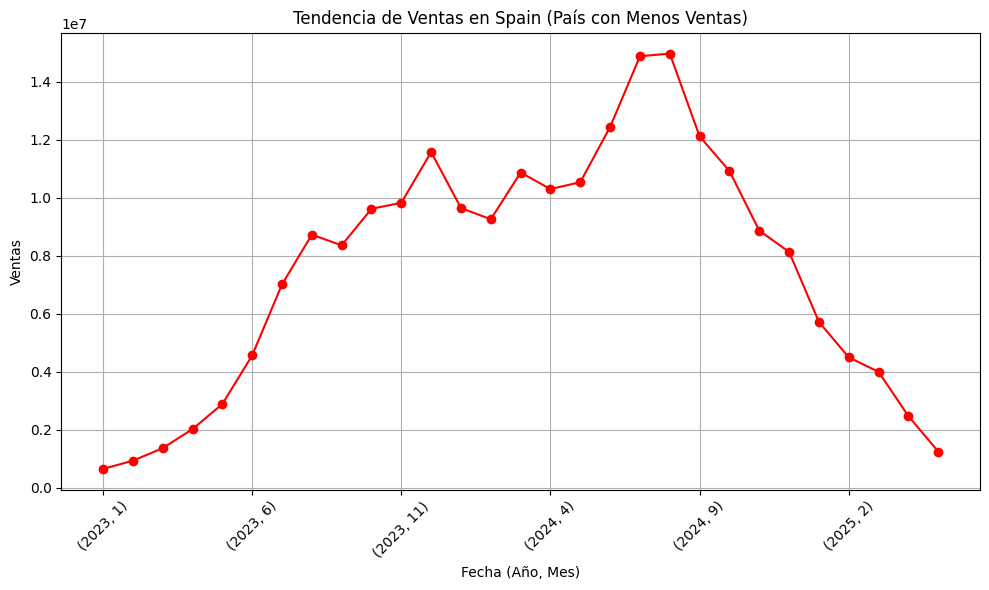

In [215]:
# Gráfico de tendencia para el país con menos ventas
plt.figure(figsize=(10, 6))
ventas_pais_menos.plot(kind='line', marker='o', color='red')
plt.title(f'Tendencia de Ventas en {pais_menos_ventas} (País con Menos Ventas)')
plt.xlabel('Fecha (Año, Mes)')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Se observa un crecimiento constante desde enero de 2023, alcanzando su punto máximo en agosto de 2024, seguido de una disminución.

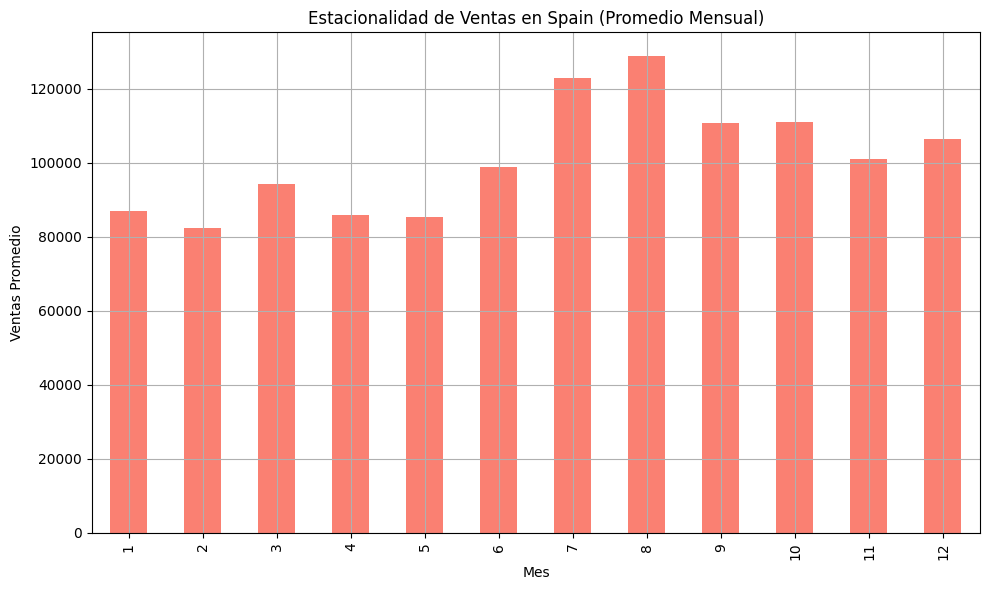

In [216]:
# Gráfico de estacionalidad para el país con menos ventas
ventas_pais_menos_estacionalidad = df[df['COUNTRY'] == pais_menos_ventas].groupby('MONTH')['AMOUNT'].mean()
plt.figure(figsize=(10, 6))
ventas_pais_menos_estacionalidad.plot(kind='bar', color='salmon')
plt.title(f'Estacionalidad de Ventas en {pais_menos_ventas} (Promedio Mensual)')
plt.xlabel('Mes')
plt.ylabel('Ventas Promedio')
plt.grid(True)
plt.tight_layout()
plt.show()


La gráfica de estacionalidad de ventas en España muestra un patrón consistente, con mayores ventas en junio, julio y agosto, superando los 120,000 litros, lo que sugiere una estacionalidad vinculada al verano. Aunque febrero, marzo y diciembre tienen menores ventas, la diferencia no es muy significativa. En general, las ventas en España siguen un patrón predecible, con picos en los meses cálidos y una ligera reducción en el resto.

Realizamos los pasos anteriores pero en vez de identificar el país con menos ventas, ahora queremos encontrar la marca con más ventas.

In [217]:
# Marca con más ventas
marca_mas_ventas = df.groupby('SUBBRAND')['AMOUNT'].sum().idxmax()
ventas_marca_mas = df[df['SUBBRAND'] == marca_mas_ventas].groupby(['YEAR', 'MONTH'])['AMOUNT'].sum()

print(f"Marca con más ventas: {marca_mas_ventas}")

Marca con más ventas: Pepsi Max (L3)


Generamos el gráfico que nos permitirá tener una mejor visualización de la temporalidad.

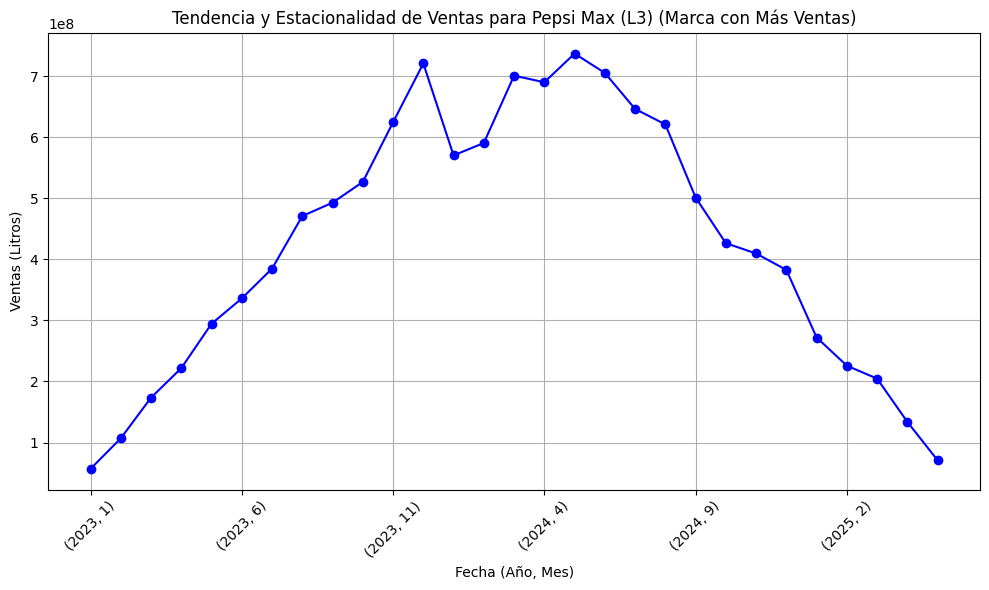

In [218]:
# Gráfico de tendencia para la marca con más ventas
plt.figure(figsize=(10, 6))
ventas_marca_mas.plot(kind='line', marker='o', color='blue')
plt.title(f'Tendencia y Estacionalidad de Ventas para {marca_mas_ventas} (Marca con Más Ventas)')
plt.xlabel('Fecha (Año, Mes)')
plt.ylabel('Ventas (Litros)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Las ventas de Pepsi Max siguen una tendencia similar, con un aumento desde principios de 2023, alcanzando su máximo a finales de 2023, y luego disminuyendo de manera sostenida.

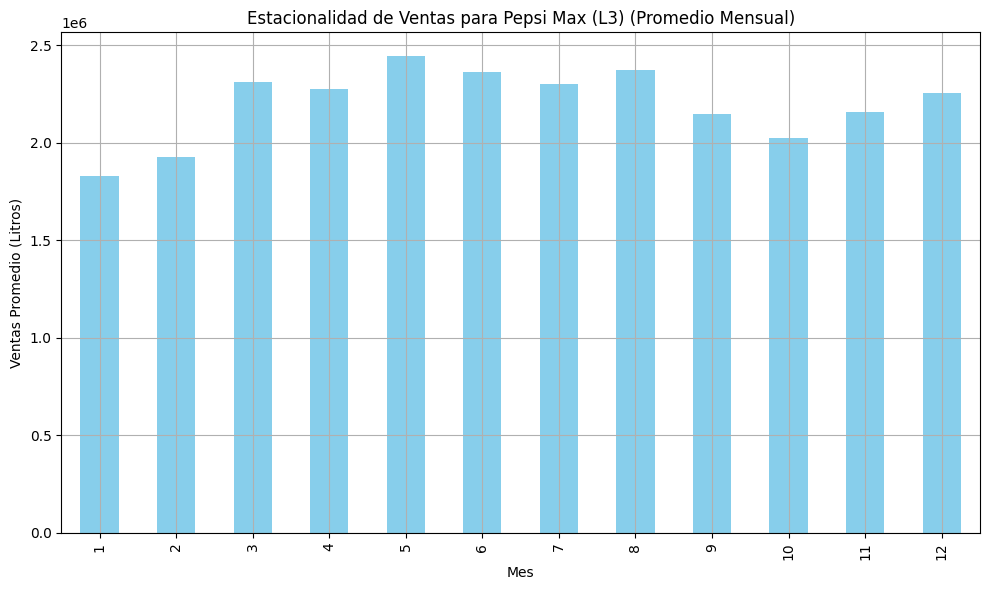

In [219]:
# Gráfico de estacionalidad para la marca con más ventas
ventas_marca_mas_estacionalidad = df[df['SUBBRAND'] == marca_mas_ventas].groupby('MONTH')['AMOUNT'].mean()
plt.figure(figsize=(10, 6))
ventas_marca_mas_estacionalidad.plot(kind='bar', color='skyblue')
plt.title(f'Estacionalidad de Ventas para {marca_mas_ventas} (Promedio Mensual)')
plt.xlabel('Mes')
plt.ylabel('Ventas Promedio (Litros)')
plt.grid(True)
plt.tight_layout()
plt.show()

La gráfica de estacionalidad de ventas para Pepsi Max (L3) muestra un promedio mensual de ventas estable, con un ligero aumento en junio, julio y agosto, alcanzando cerca de 2.5 millones de litros. Esto sugiere una demanda moderadamente más alta en verano, aunque la estabilidad en las ventas indica una preferencia continua por el producto durante todo el año.

10. Predicciones en España y precisión

Para evitar datos redundantes, filtramos el DataFrame para obtener solo una fila por combinación de COUNTRY, SUBBRAND, YEAR, MONTH, y FORECAST.

In [220]:
# Filtrar y eliminar duplicados
df_unique = df.drop_duplicates(subset=['COUNTRY', 'SUBBRAND', 'YEAR', 'MONTH', 'FORECAST'])

Aquí separamos los datos para obtener solo los registros de predicciones y ventas reales correspondientes a España.

In [221]:
# Filtrar solo datos de predicciones y ventas reales en España
predicciones_espana = df_unique[(df_unique['COUNTRY'] == 'Spain') & (df_unique['SCENARIO'] == 'AI_forecast')]
ventas_reales_espana = df_unique[(df_unique['COUNTRY'] == 'Spain') & (df_unique['SCENARIO'] == 'actual')]

En este paso, calculamos el promedio de las predicciones para cada FORECAST y lo comparamos con el promedio de las ventas reales.

In [222]:
# Calcular la media de cada `FORECAST`
media_predicciones = predicciones_espana.groupby(['YEAR', 'MONTH', 'FORECAST'])['AMOUNT'].mean().reset_index()
media_ventas_reales = ventas_reales_espana.groupby(['YEAR', 'MONTH'])['AMOUNT'].mean().reset_index()

# Unir predicciones promedio y ventas reales promedio
comparacion_media = pd.merge(media_predicciones, media_ventas_reales, on=['YEAR', 'MONTH'], suffixes=('_pred', '_real'))


Finalmente, graficamos el promedio de las predicciones de cada FORECAST junto con el promedio de las ventas reales para facilitar una comparación.

<ipython-input-223-cd164e1c942c>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores = cm.get_cmap('tab20', len(comparacion_media['FORECAST'].unique()))


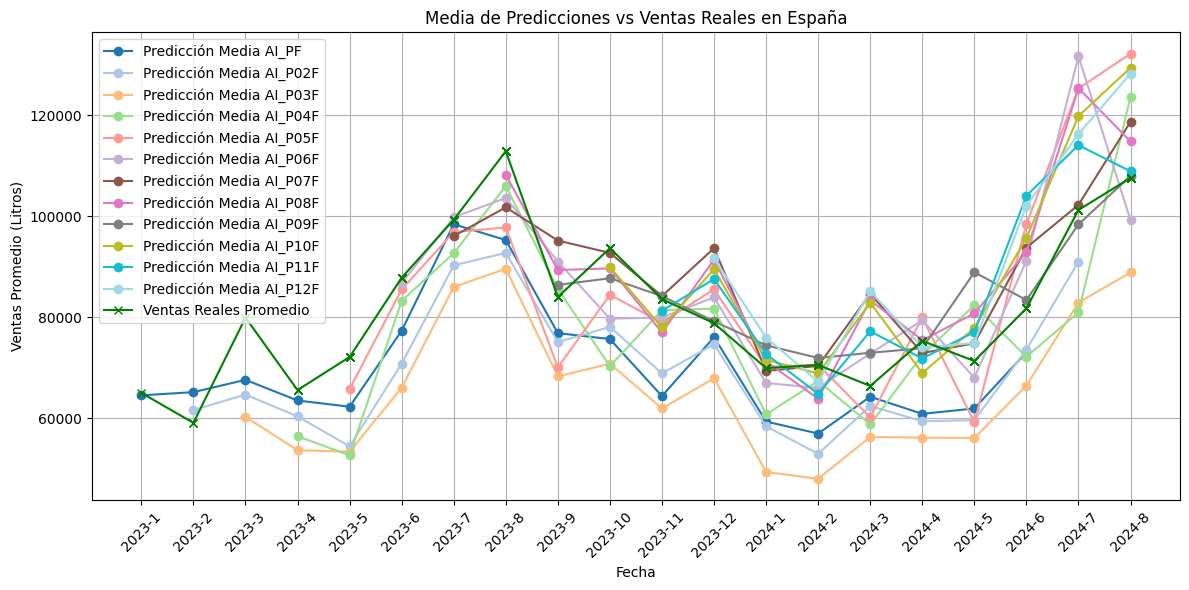

In [223]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm

# Definir una paleta de colores
colores = cm.get_cmap('tab20', len(comparacion_media['FORECAST'].unique()))

# Graficar media de predicciones vs ventas reales
plt.figure(figsize=(12, 6))
for i, forecast in enumerate(comparacion_media['FORECAST'].unique()):
    datos_forecast = comparacion_media[comparacion_media['FORECAST'] == forecast]
    plt.plot(datos_forecast['YEAR'].astype(str) + '-' + datos_forecast['MONTH'].astype(str),
             datos_forecast['AMOUNT_pred'], label=f'Predicción Media {forecast}', marker='o', color=colores(i))

# Graficar ventas reales promedio
plt.plot(comparacion_media['YEAR'].astype(str) + '-' + comparacion_media['MONTH'].astype(str),
         comparacion_media['AMOUNT_real'], label='Ventas Reales Promedio', color='green', marker='x')

# Ajustes de la gráfica
plt.title('Media de Predicciones vs Ventas Reales en España')
plt.xlabel('Fecha')
plt.ylabel('Ventas Promedio (Litros)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Se ve claramente en el gráfico cómo cada predicción media, diferenciada por el tipo de forecast, sigue de cerca la tendencia de las ventas reales promedio a lo largo del tiempo. Esto permite observar la precisión y la variabilidad de las diferentes predicciones en comparación con los datos reales. Sin embargo, para una visualización más detallada y clara, vamos a dividir el gráfico en 12 gráficos individuales, cada uno correspondiente a un forecast específico.

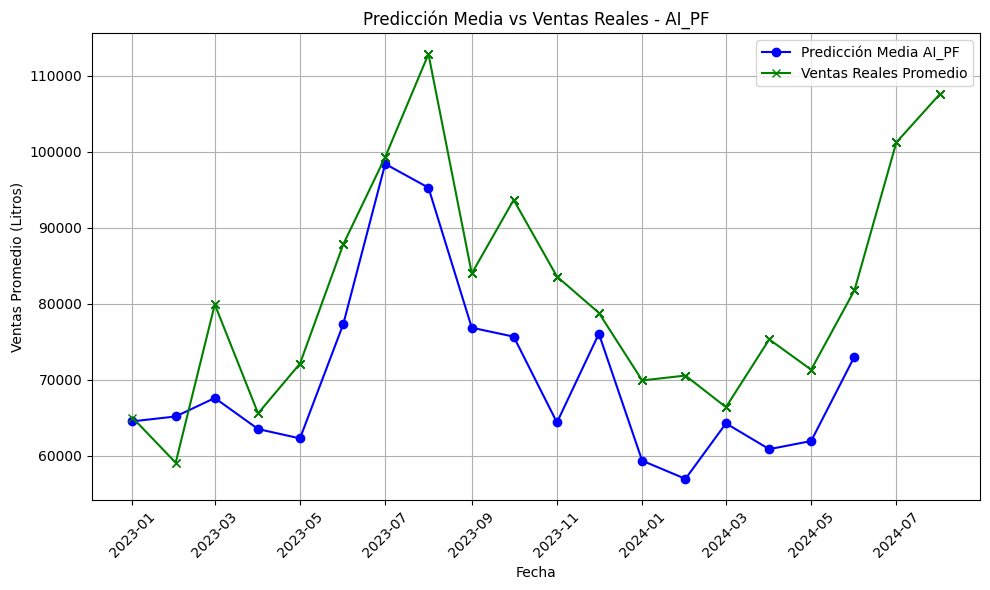

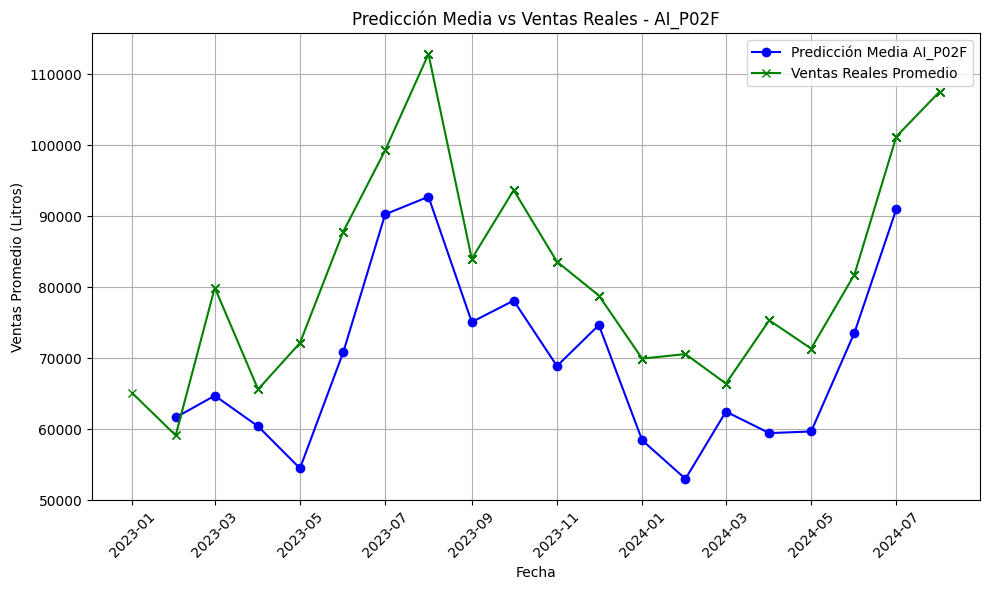

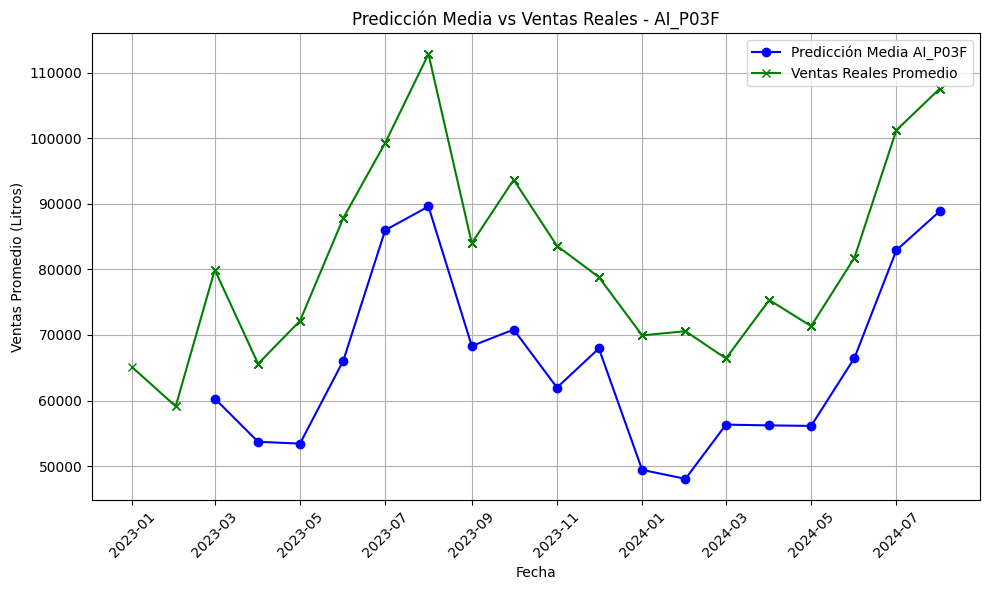

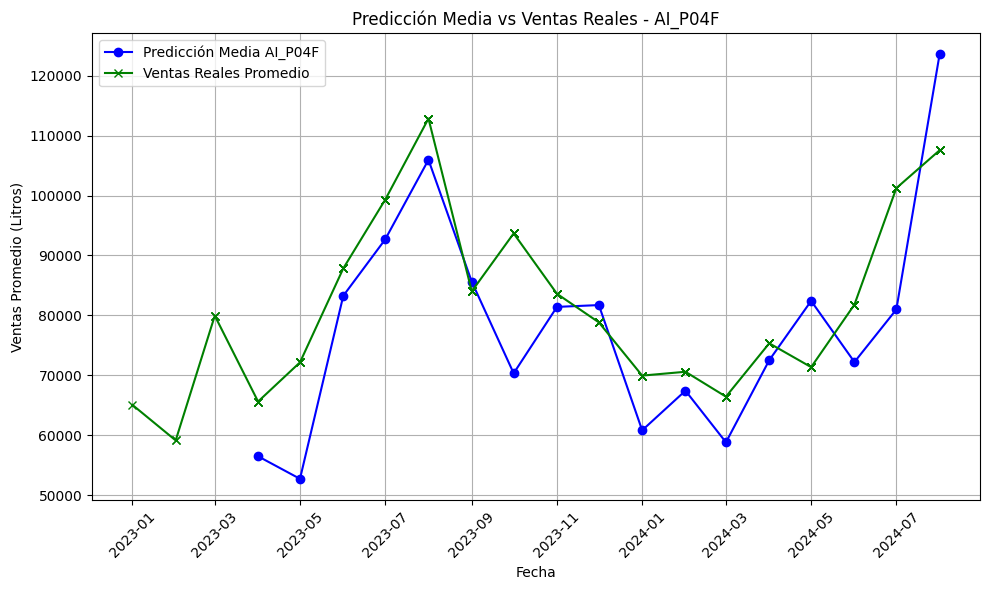

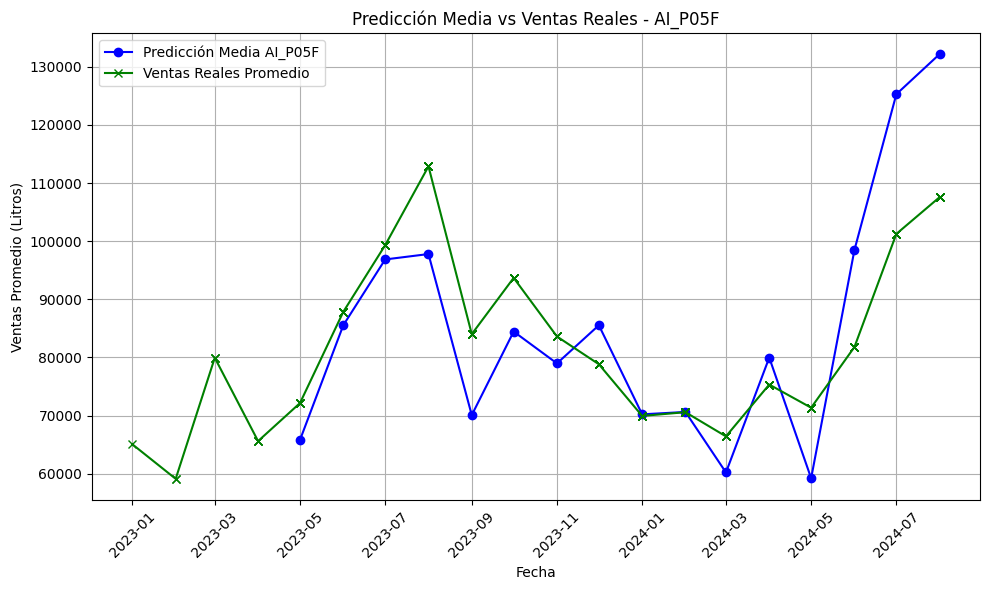

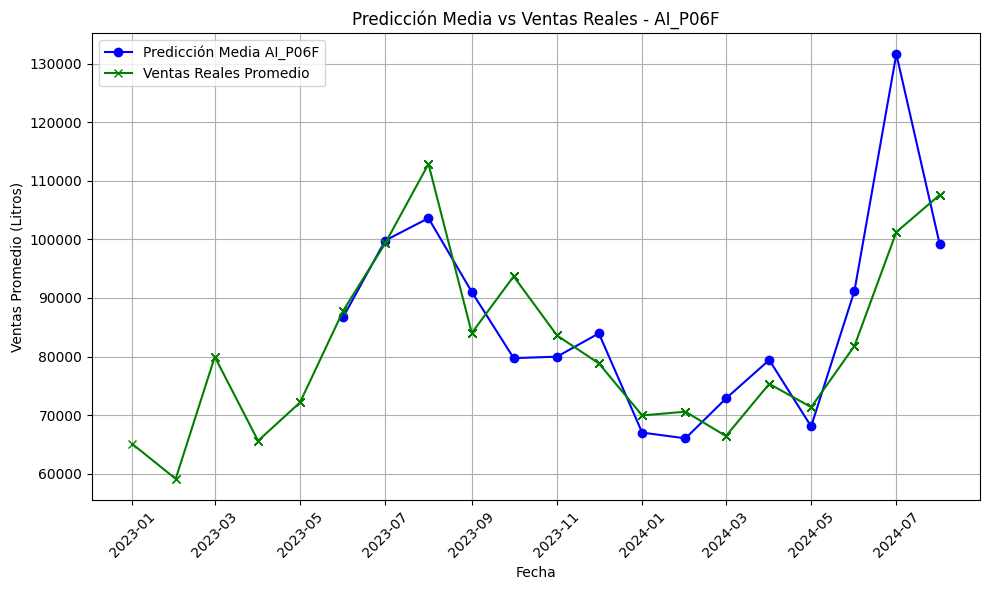

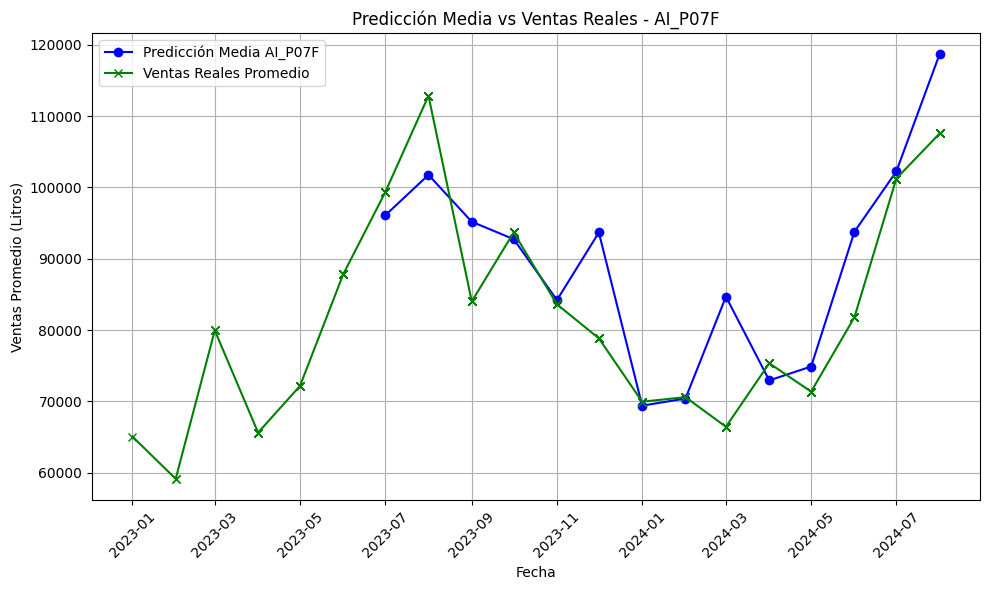

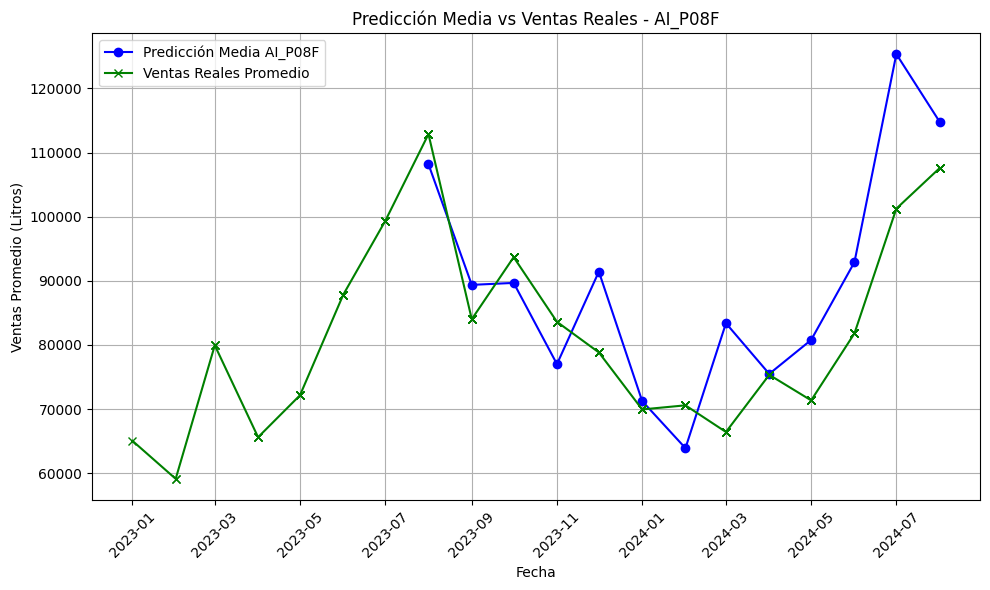

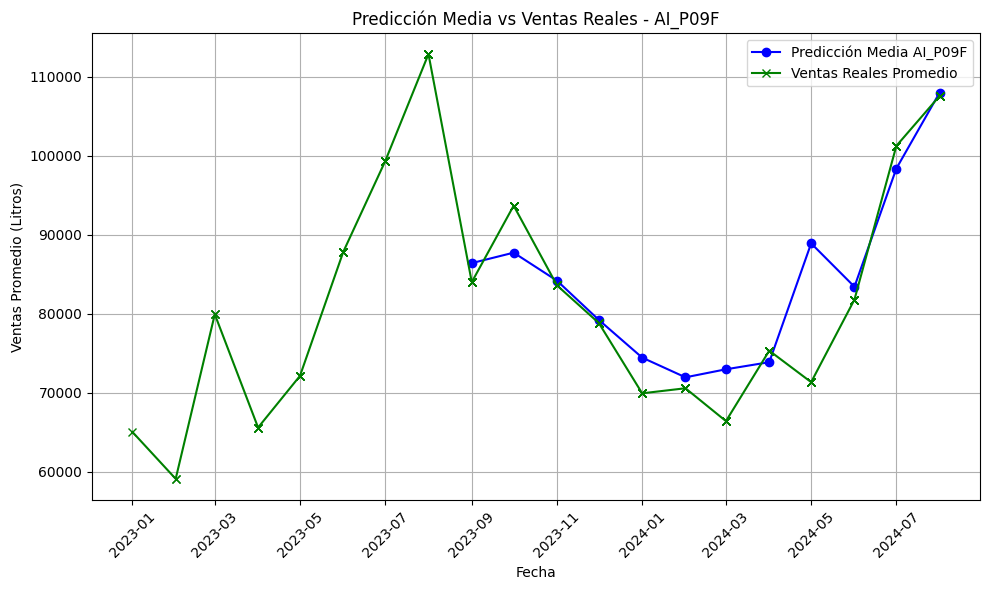

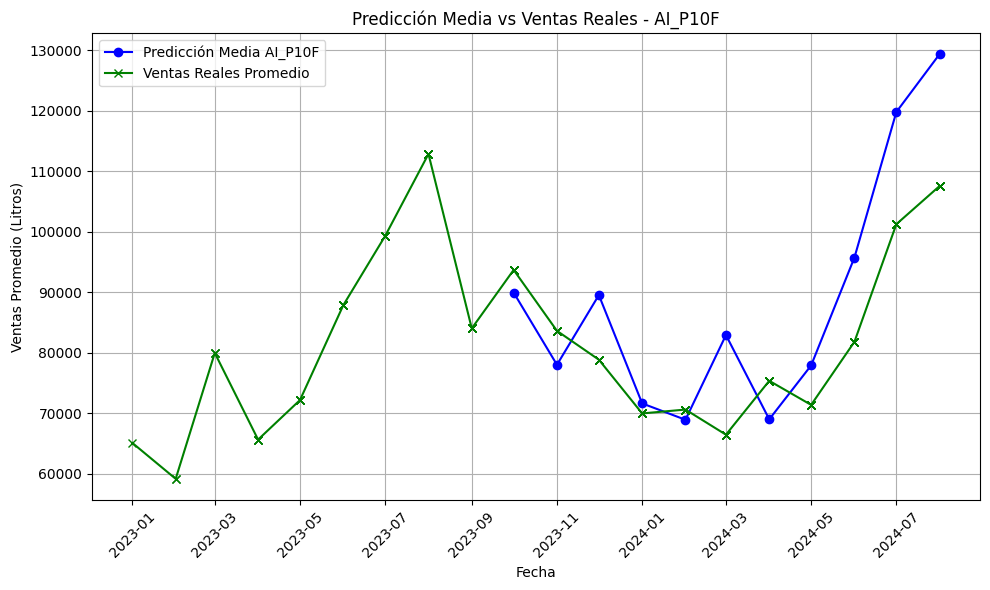

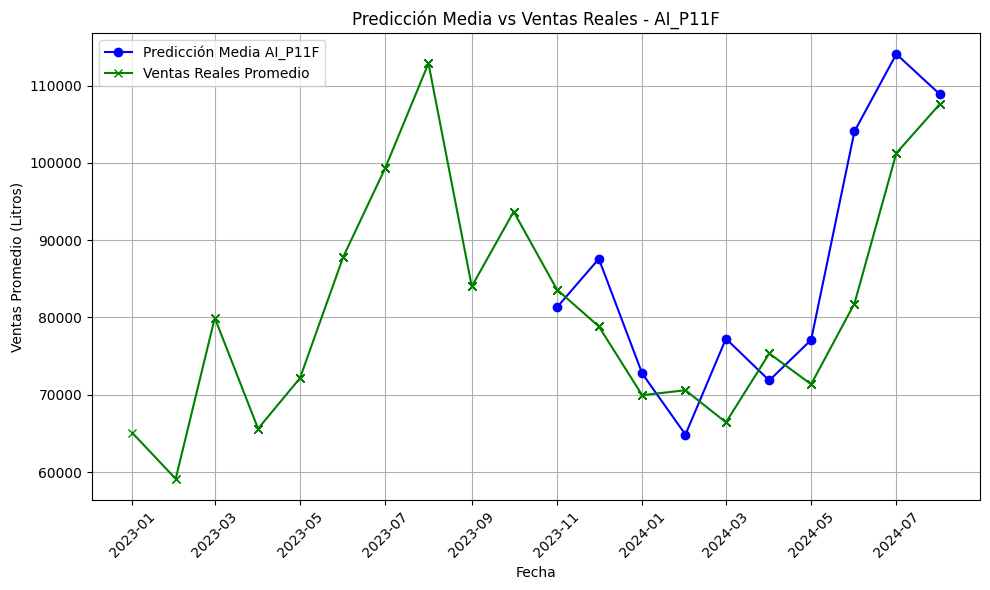

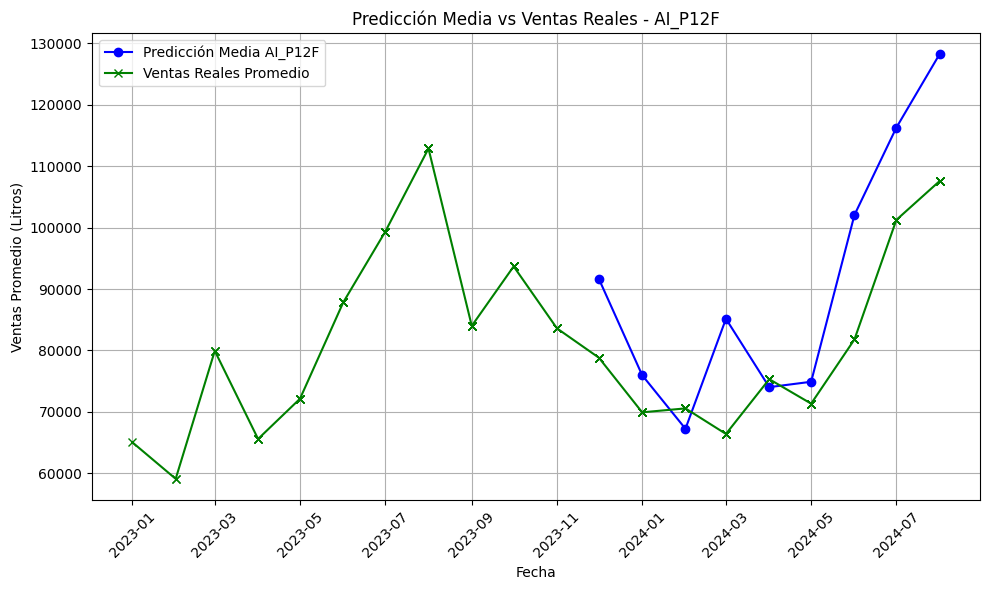

In [224]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear una nueva columna de fecha combinando YEAR y MONTH y convirtiéndola en datetime
comparacion_media['Fecha'] = pd.to_datetime(comparacion_media['YEAR'].astype(str) + '-' + comparacion_media['MONTH'].astype(str), format='%Y-%m')

# Dividir y graficar cada forecast individualmente
for forecast in comparacion_media['FORECAST'].unique():
    plt.figure(figsize=(10, 6))

    # Filtrar datos para el forecast actual y ordenar por la columna de fecha
    datos_forecast = comparacion_media[comparacion_media['FORECAST'] == forecast].sort_values(by='Fecha')

    # Graficar la predicción media para el forecast actual
    plt.plot(datos_forecast['Fecha'], datos_forecast['AMOUNT_pred'], label=f'Predicción Media {forecast}', marker='o', color='blue')

    # Ordenar ventas reales promedio y graficarlas
    ventas_reales_ordenadas = comparacion_media.sort_values(by='Fecha')
    plt.plot(ventas_reales_ordenadas['Fecha'], ventas_reales_ordenadas['AMOUNT_real'], label='Ventas Reales Promedio', color='green', marker='x')

    # Ajustes de la gráfica
    plt.title(f'Predicción Media vs Ventas Reales - {forecast}')
    plt.xlabel('Fecha')
    plt.ylabel('Ventas Promedio (Litros)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Observando las gráficas, parece que las predicciones en España siguen en gran medida la tendencia de las ventas reales, aunque hay variaciones y en algunos periodos las predicciones están por debajo o por encima de las ventas reales promedio. La precisión se puede considerar buena en términos de capturar la estacionalidad general y la dirección de las ventas.